<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_21_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Загрузка данных
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')

Mounted at /content/drive


In [7]:
# Кодирование категориальных переменных
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [9]:
# Выбор признаков и целевой переменной
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = df['Survived'].values


In [10]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [11]:
# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Создание и обучение модели XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=10)
r2_scores = []

for n in range(1, 101):
    xgb_model.set_params(n_estimators=n)
    xgb_model.fit(X_train, y_train)
    r2_score = xgb_model.score(X_train, y_train)
    r2_scores.append(r2_score)

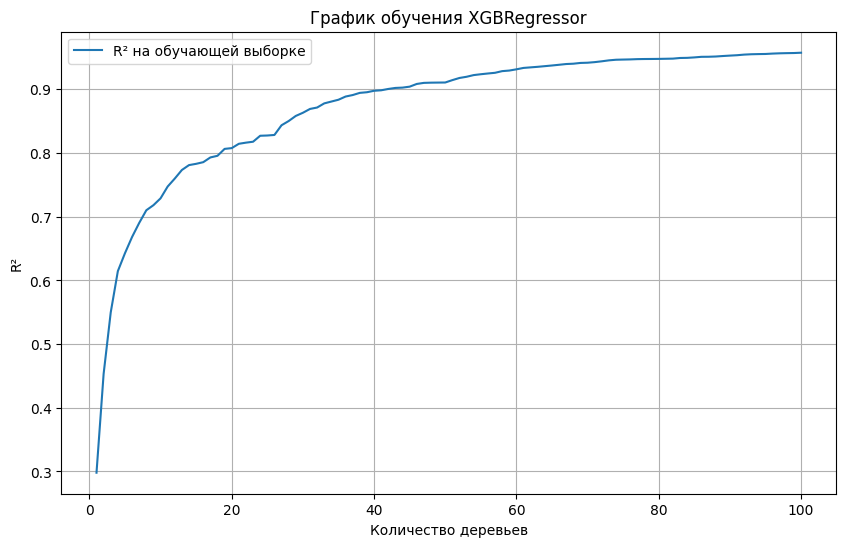

In [13]:
# Построение графика обучения
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), r2_scores, label='R² на обучающей выборке')
plt.xlabel('Количество деревьев')
plt.ylabel('R²')
plt.title('График обучения XGBRegressor')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Финальное обучение и предсказание
xgb_model.set_params(n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [15]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')


MSE: 0.15
MAE: 0.24


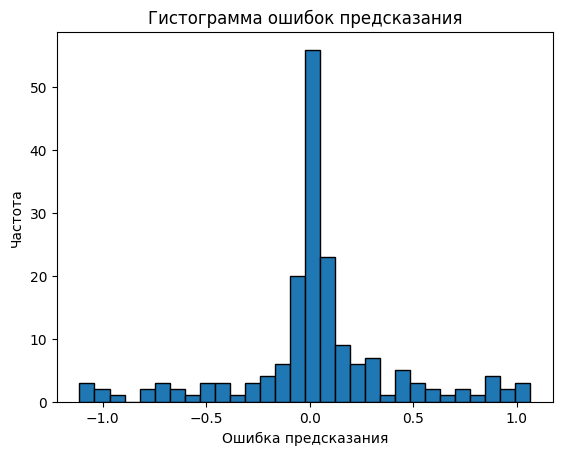

In [16]:
# Визуализация ошибок
errors = y_pred - y_test
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок предсказания')
plt.show()